<b> In this notebook, i start to tabulate and explore the Events table using SQL </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataframe
df = pd.read_csv('C:/Users/dlili/OneDrive/Documents/CSUMB/UROC Fall 2020/CSV Files/Events_Table_Results.csv')

# Import SQL stuff

import sqlalchemy
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
df.to_sql('df', con=engine)

In [2]:
# Take a look at the top few columns
df.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Actor1Name,Actor1CountryCode,Actor2Name,Actor2CountryCode,EventCode,GoldsteinScale,NumMentions,...,NumArticles,AvgTone,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor2Geo_FullName,Actor2Geo_CountryCode,ActionGeo_FullName,ActionGeo_ADM1Code,ActionGeo_ADM2Code,SOURCEURL
0,949132562,20200928,202009,VANUATU,VUT,NaN,NaN,20,3.0,10,...,10,-4.081633,"Efate, Shefa, Vanuatu",NH,NaN,NaN,"Efate, Shefa, Vanuatu",NH18,40197.0,https://www.rnz.co.nz/international/pacific-ne...
1,949132563,20200928,202009,VANUATU,VUT,NaN,NaN,23,3.4,10,...,10,-4.081633,"Efate, Shefa, Vanuatu",NH,NaN,NaN,"Efate, Shefa, Vanuatu",NH18,40197.0,https://www.rnz.co.nz/international/pacific-ne...
2,949121986,20200928,202009,HEALTH PROFESSIONAL,NaN,POPULATION,NaN,12,-0.4,2,...,2,-0.739645,French Polynesia,FP,French Polynesia,FP,French Polynesia,FP,NaN,https://thestandard.org.nz/open-mike-29-09-2020/
3,949121845,20200928,202009,GAMBIA,GMB,REBELLION,NaN,172,-5.0,1,...,1,-0.739645,"Tiwai Point, New Zealand (general), New Zealand",NZ,French Polynesia,FP,French Polynesia,FP,NaN,https://thestandard.org.nz/open-mike-29-09-2020/
4,949079933,20200928,202009,FIJI,FJI,NaN,NaN,42,1.9,10,...,10,-4.576659,"Vanuabalavu, Eastern, Fiji",FJ,NaN,NaN,"Vanuabalavu, Eastern, Fiji",FJ02,40201.0,https://www.fijitimes.com/plane-crash-claims-a...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913328 entries, 0 to 1913327
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   GLOBALEVENTID          int64  
 1   SQLDATE                int64  
 2   MonthYear              int64  
 3   Actor1Name             object 
 4   Actor1CountryCode      object 
 5   Actor2Name             object 
 6   Actor2CountryCode      object 
 7   EventCode              int64  
 8   GoldsteinScale         float64
 9   NumMentions            int64  
 10  NumSources             int64  
 11  NumArticles            int64  
 12  AvgTone                float64
 13  Actor1Geo_FullName     object 
 14  Actor1Geo_CountryCode  object 
 15  Actor2Geo_FullName     object 
 16  Actor2Geo_CountryCode  object 
 17  ActionGeo_FullName     object 
 18  ActionGeo_ADM1Code     object 
 19  ActionGeo_ADM2Code     float64
 20  SOURCEURL              object 
dtypes: float64(3), int64(7), object(11)
memory usage: 306.

# Who are the top actor for all Oceania?

In [4]:
pd.set_option('display.max_colwidth', -1)


# This query displayes the Actor1Geo_FullName and the total count of the number of Actor1Geo_CountryCode's 
query = """
SELECT Actor1Geo_FullName, count(*) as count
FROM df
GROUP BY Actor1Geo_CountryCode
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['Actor1Geo_FullName','count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
# Show the top 20 results
df2.head(20)

C:\Users\dlili\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Actor1Geo_FullName,count
0,"Perdana, Banten, Indonesia",443477
1,"Vanuabalavu, Eastern, Fiji",292130
2,<NA>,223870
3,"Sandaun, Sandaun, Papua New Guinea",145815
4,Guam,134087
5,Samoa,101269
6,"Vavau, Vava‘u, Tonga",49460
7,"Efate, Shefa, Vanuatu",47263
8,"Koror, Palau (general), Palau",47249
9,"Choiseul, Solomon Islands (general), Solomon Islands",45774


In [5]:
# This query displayes the Actor1Geo_FullName and the total count of the number of Actor1Geo_CountryCode's 
# but filters out all null values
query = """
SELECT Actor1Geo_FullName, count(*) as count
FROM df
WHERE Actor1Geo_CountryCode IS NOT NULL
GROUP BY Actor1Geo_CountryCode
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['Actor1Geo_FullName','count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
# Show the top 20 results
df2.head(20)

,Actor1Geo_FullName,count
0,"Perdana, Banten, Indonesia",443477
1,"Vanuabalavu, Eastern, Fiji",292130
2,"Sandaun, Sandaun, Papua New Guinea",145815
3,Guam,134087
4,Samoa,101269
5,"Vavau, Vava‘u, Tonga",49460
6,"Efate, Shefa, Vanuatu",47263
7,"Koror, Palau (general), Palau",47249
8,"Choiseul, Solomon Islands (general), Solomon Islands",45774
9,"Pleasant Island, Nauru (general), Nauru",41698


In [6]:
# This query displayes the Actor2Geo_FullName and the total count of the number of Actor1Geo_CountryCode's 
query = """
SELECT Actor2Geo_FullName, count(*) as count
FROM df
GROUP BY Actor2Geo_CountryCode
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['Actor2Geo_FullName','count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
# Show the top 20 results
df2.head(20)

,Actor2Geo_FullName,count
0,<NA>,647634
1,Indonesia,295293
2,"Vanuabalavu, Eastern, Fiji",223747
3,"Western Province, Western, Papua New Guinea",113692
4,Guam,103308
5,Samoa,76978
6,"Vavau, Vava‘u, Tonga",39133
7,"Nguna, Shefa, Vanuatu",36722
8,"Choiseul, Solomon Islands (general), Solomon Islands",36695
9,"Pleasant Island, Nauru (general), Nauru",35407


In [7]:
# This query displayes the Actor2Geo_FullName and the total count of the number of Actor1Geo_CountryCode's 
# but filters out all null values
query = """
SELECT Actor2Geo_FullName, count(*) as count
FROM df
WHERE Actor2Geo_CountryCode IS NOT NULL
GROUP BY Actor2Geo_CountryCode
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['Actor2Geo_FullName','count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
# Show the top 20 results
df2.head(20)

,Actor2Geo_FullName,count
0,Indonesia,295293
1,"Vanuabalavu, Eastern, Fiji",223747
2,"Western Province, Western, Papua New Guinea",113692
3,Guam,103308
4,Samoa,76978
5,"Vavau, Vava‘u, Tonga",39133
6,"Nguna, Shefa, Vanuatu",36722
7,"Choiseul, Solomon Islands (general), Solomon Islands",36695
8,"Pleasant Island, Nauru (general), Nauru",35407
9,"Koror, Palau (general), Palau",33851


In [8]:
# This query shows the total amount of events for the combinations of Actor1Geo_FullName and Actor2Geo_FullName

query = """
SELECT Actor1Geo_FullName, Actor2Geo_FullName, count(*) as count
FROM df
GROUP BY Actor1Geo_FullName, Actor2Geo_FullName
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['Actor1Geo_FullName','Actor2Geo_FullName', 'count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
# Show the top 20 results
df2.head(20)

,Actor1Geo_FullName,Actor2Geo_FullName,count
0,Guam,Guam,71917
1,Fiji,Fiji,63862
2,"Bandung, Jawa Barat, Indonesia",<NA>,52576
3,Guam,<NA>,51296
4,"Bandung, Jawa Barat, Indonesia","Bandung, Jawa Barat, Indonesia",46585
5,Fiji,<NA>,44650
6,"Suva, Central, Fiji","Suva, Central, Fiji",34606
7,Samoa,Samoa,27943
8,"Tangerang, Jawa Barat, Indonesia",<NA>,23186
9,Samoa,<NA>,23146


In [9]:
# This query shows the total amount of events for the combinations of ActionGeo_FullName, Actor1Geo_FullName, and Actor2Geo_FullName

query = """
SELECT ActionGeo_FullName, Actor1Geo_FullName, Actor2Geo_FullName, count(*) as count
FROM df
GROUP BY ActionGeo_FullName, Actor1Geo_FullName, Actor2Geo_FullName
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_FullName', 'Actor1Geo_FullName','Actor2Geo_FullName', 'count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
# Show the top 20 results
df2.head(20)

,ActionGeo_FullName,Actor1Geo_FullName,Actor2Geo_FullName,count
0,Guam,Guam,Guam,71653
1,Fiji,Fiji,Fiji,62901
2,"Bandung, Jawa Barat, Indonesia","Bandung, Jawa Barat, Indonesia",<NA>,51548
3,Guam,Guam,<NA>,51046
4,"Bandung, Jawa Barat, Indonesia","Bandung, Jawa Barat, Indonesia","Bandung, Jawa Barat, Indonesia",46226
5,Fiji,Fiji,<NA>,44140
6,"Suva, Central, Fiji","Suva, Central, Fiji","Suva, Central, Fiji",34111
7,Samoa,Samoa,Samoa,27524
8,"Tangerang, Jawa Barat, Indonesia","Tangerang, Jawa Barat, Indonesia",<NA>,22924
9,Samoa,Samoa,<NA>,22889


After looking at this result and doing some quick googling, Jawa Barat, Indonesia is not part of oceania and so it needs to be excluded 

# Re-Do the last few queries to exclude Jawa Barat, Indonesia

Note: we only need to exclude Jawa Barat, Indonesia from the ActionGeo_FullName because we still want to know if it pops up in the Actor1Geo_FullName, and Actor2Geo_FullName columns

In [10]:
# This query shows the total amount of events for the combinations of ActionGeo_FullName, Actor1Geo_FullName, and Actor2Geo_FullName
# Excluding Jawa Barat, Indonesia from the ActionGeo_FullName. 

query = """
SELECT ActionGeo_FullName, Actor1Geo_FullName, Actor2Geo_FullName, count(*) as count
FROM df
WHERE ActionGeo_FullName NOT LIKE '%Jawa Barat, Indonesia'
GROUP BY ActionGeo_FullName, Actor1Geo_FullName, Actor2Geo_FullName
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_FullName', 'Actor1Geo_FullName','Actor2Geo_FullName', 'count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
# Show the top 20 results
df2.head(20)

,ActionGeo_FullName,Actor1Geo_FullName,Actor2Geo_FullName,count
0,Guam,Guam,Guam,71653
1,Fiji,Fiji,Fiji,62901
2,Guam,Guam,<NA>,51046
3,Fiji,Fiji,<NA>,44140
4,"Suva, Central, Fiji","Suva, Central, Fiji","Suva, Central, Fiji",34111
5,Samoa,Samoa,Samoa,27524
6,Samoa,Samoa,<NA>,22889
7,"Suva, Central, Fiji","Suva, Central, Fiji",<NA>,21704
8,Nauru,Nauru,Nauru,21573
9,Palau,Palau,<NA>,21408


In [11]:
# This query shows the total amount of events for the combinations of Actor1Geo_FullName and Actor2Geo_FullName
# Excluding Jawa Barat, Indonesia from the ActionGeo_FullName. 

query = """
SELECT Actor1Geo_FullName, Actor2Geo_FullName, count(*) as count
FROM df
WHERE ActionGeo_FullName NOT LIKE '%Jawa Barat, Indonesia'
GROUP BY Actor1Geo_FullName, Actor2Geo_FullName
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['Actor1Geo_FullName','Actor2Geo_FullName', 'count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
# Show the top 20 results
df2.head(20)

,Actor1Geo_FullName,Actor2Geo_FullName,count
0,Guam,Guam,71916
1,Fiji,Fiji,63856
2,Guam,<NA>,51286
3,Fiji,<NA>,44646
4,"Suva, Central, Fiji","Suva, Central, Fiji",34606
5,Samoa,Samoa,27943
6,Samoa,<NA>,23146
7,"Suva, Central, Fiji",<NA>,22546
8,Nauru,Nauru,21878
9,Palau,<NA>,21532


In [12]:
# This query displayes the Actor1Geo_FullName and the total count of the number of Actor1Geo_CountryCode's 
# Excluding Jawa Barat, Indonesia from the ActionGeo_FullName. 

query = """
SELECT Actor1Geo_FullName, count(*) as count
FROM df
WHERE ActionGeo_FullName NOT LIKE '%Jawa Barat, Indonesia'
GROUP BY Actor1Geo_CountryCode
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['Actor1Geo_FullName','count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
# Show the top 20 results
df2.head(20)

,Actor1Geo_FullName,count
0,"Vanuabalavu, Eastern, Fiji",292111
1,<NA>,162172
2,"Sandaun, Sandaun, Papua New Guinea",145515
3,Guam,134076
4,Samoa,101269
5,"Vavau, Vava‘u, Tonga",49460
6,"Koror, Palau (general), Palau",46864
7,"Efate, Shefa, Vanuatu",46695
8,"Choiseul, Solomon Islands (general), Solomon Islands",45717
9,"Pleasant Island, Nauru (general), Nauru",41695


In [13]:
# This query displayes the Actor2Geo_FullName and the total count of the number of Actor1Geo_CountryCode's 
# Excluding Jawa Barat, Indonesia from the ActionGeo_FullName. 
query = """
SELECT Actor2Geo_FullName, count(*) as count
FROM df
WHERE ActionGeo_FullName NOT LIKE '%Jawa Barat, Indonesia'
GROUP BY Actor2Geo_CountryCode
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['Actor2Geo_FullName','count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
# Show the top 20 results
df2.head(20)

,Actor2Geo_FullName,count
0,<NA>,442422
1,"Vanuabalavu, Eastern, Fiji",223731
2,"Western Province, Western, Papua New Guinea",113424
3,Guam,103289
4,Samoa,76974
5,"Vavau, Vava‘u, Tonga",39133
6,"Choiseul, Solomon Islands (general), Solomon Islands",36651
7,"Nguna, Shefa, Vanuatu",36306
8,"Pleasant Island, Nauru (general), Nauru",35403
9,"Koror, Palau (general), Palau",33504


# What are the top 5 event codes in all events in oceania?

In [14]:
# This query gives the top 10 event codes in oceania

query = """
SELECT EventCode, count(*) as count
FROM df
WHERE ActionGeo_FullName NOT LIKE '%Jawa Barat, Indonesia'
GROUP BY EventCode
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['EventCode','count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
# Show the top 20 results
df2.head(10)

,EventCode,count
0,42,148004
1,43,138796
2,10,115610
3,51,96718
4,20,93854
5,40,92612
6,36,80574
7,46,41807
8,173,37342
9,60,30202


In [15]:
# This just gives us quick summary statstics of the most recent result
df2.describe()

,EventCode,count
count,236.000000,236.000000
mean,446.262712,6012.724576
std,534.395342,19721.888747
min,10.000000,1.000000
25%,83.750000,49.750000
50%,171.500000,325.000000
75%,841.250000,1922.500000
max,1832.000000,148004.000000


In [16]:
# This query gives the top 10 event codes in oceania along with there average tones

query = """
SELECT df.EventCode, count(df.EventCode) as count, t.tone
FROM
(SELECT EventCode, avg(AvgTone) as tone
FROM df
WHERE ActionGeo_FullName NOT LIKE '%Jawa Barat, Indonesia'
GROUP BY EventCode) t join df on t.EventCode = df.EventCode
WHERE ActionGeo_FullName NOT LIKE '%Jawa Barat, Indonesia'
GROUP BY df.EventCode
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['EventCode','count','tone'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
df2['tone'] = df2['tone'].astype(float)
# Show the top 20 results
df2.head(10)

,EventCode,count,tone
0,42,148004,-0.134914
1,43,138796,-0.085159
2,10,115610,-1.626249
3,51,96718,1.443666
4,20,93854,-1.260189
5,40,92612,-0.203220
6,36,80574,0.527803
7,46,41807,0.144267
8,173,37342,-5.622680
9,60,30202,0.041636


# What is the average tone across all event codes?

In [17]:
# This query gives the highest average tones with the eventcode

query = """
SELECT EventCode, avg(AvgTone) as tone
FROM df
WHERE ActionGeo_FullName NOT LIKE '%Jawa Barat, Indonesia'
GROUP BY EventCode
ORDER BY tone DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['EventCode','tone'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['tone'] = df2['tone'].astype(float)
# Show the top 20 results
df2.head(20)

,EventCode,tone
0,54,2.047282
1,861,2.026905
2,74,1.921955
3,1311,1.833873
4,1661,1.727951
5,51,1.443666
6,17,1.336052
7,39,1.168588
8,57,0.863635
9,44,0.820288


In [18]:
# I am working on trying to display the top 5 event codes, the amount of times those eventcodes appear, and average tone 
# for each ActionGeo_FullName

query = """
SELECT DISTINCT df.ActionGeo_FullName, df.EventCode, count(df.EventCode) as count, t.tone
FROM
(SELECT EventCode, avg(AvgTone) as tone
FROM df
WHERE ActionGeo_FullName NOT LIKE '%Jawa Barat, Indonesia'
GROUP BY EventCode) t join df on t.EventCode = df.EventCode
WHERE ActionGeo_FullName NOT LIKE '%Jawa Barat, Indonesia'
GROUP BY df.ActionGeo_FullName, df.EventCode
ORDER BY df.ActionGeo_FullName, count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_FullName','EventCode','count','tone'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
df2['tone'] = df2['tone'].astype(float)
# Show the top 20 results
df2.head(10)

,ActionGeo_FullName,EventCode,count,tone
0,"Aana, Samoa (general), Samoa",40,10,-0.203220
1,"Aana, Samoa (general), Samoa",31,8,-0.070392
2,"Aana, Samoa (general), Samoa",100,7,-1.688793
3,"Aana, Samoa (general), Samoa",51,6,1.443666
4,"Aana, Samoa (general), Samoa",42,6,-0.134914
5,"Aana, Samoa (general), Samoa",43,5,-0.085159
6,"Aana, Samoa (general), Samoa",10,3,-1.626249
7,"Aana, Samoa (general), Samoa",190,2,-3.802999
8,"Aana, Samoa (general), Samoa",110,2,-1.642569
9,"Aana, Samoa (general), Samoa",173,1,-5.622680


In [19]:
# What is the size of this result
df2.count()

ActionGeo_FullName    47366
EventCode             47366
count                 47366
tone                  47366
dtype: int64

<AxesSubplot:>

<Figure size 3600x576 with 0 Axes>

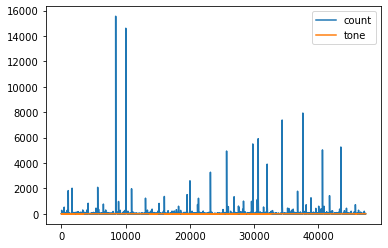

In [20]:
plt.figure(figsize=(50,8))
df2[['count','tone']].plot()

Text(0, 0.5, 'count')

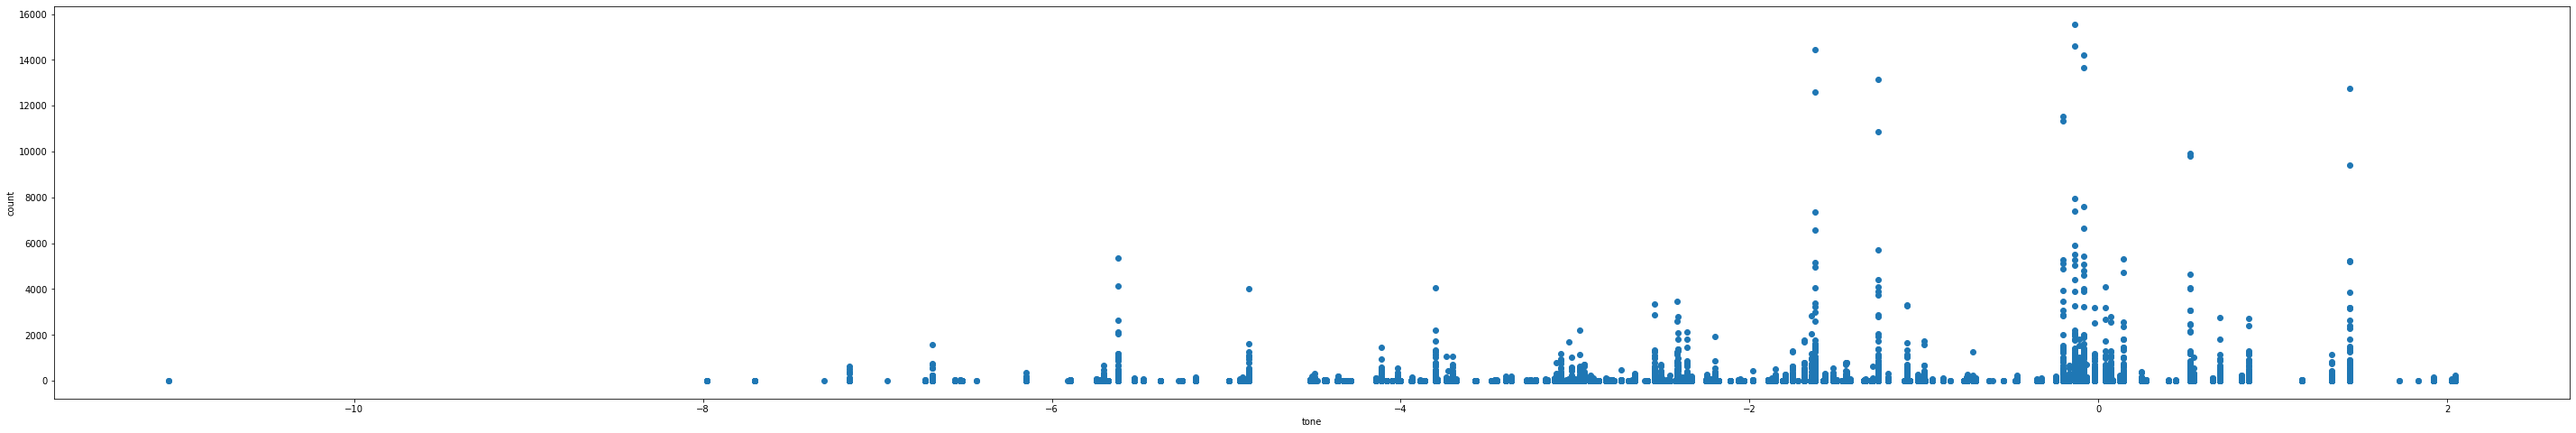

In [21]:
plt.figure(figsize=(50,8))
plt.scatter(df2['tone'],df2['count'])
plt.xlabel('tone')
plt.ylabel('count')

In [22]:
df2.describe()

,count,tone
count,47366.000000,47366.000000
mean,29.958261,-1.506426
std,296.024198,1.875755
min,1.000000,-11.064412
25%,1.000000,-2.545950
50%,2.000000,-1.333251
75%,7.000000,-0.085159
max,15560.000000,2.047282


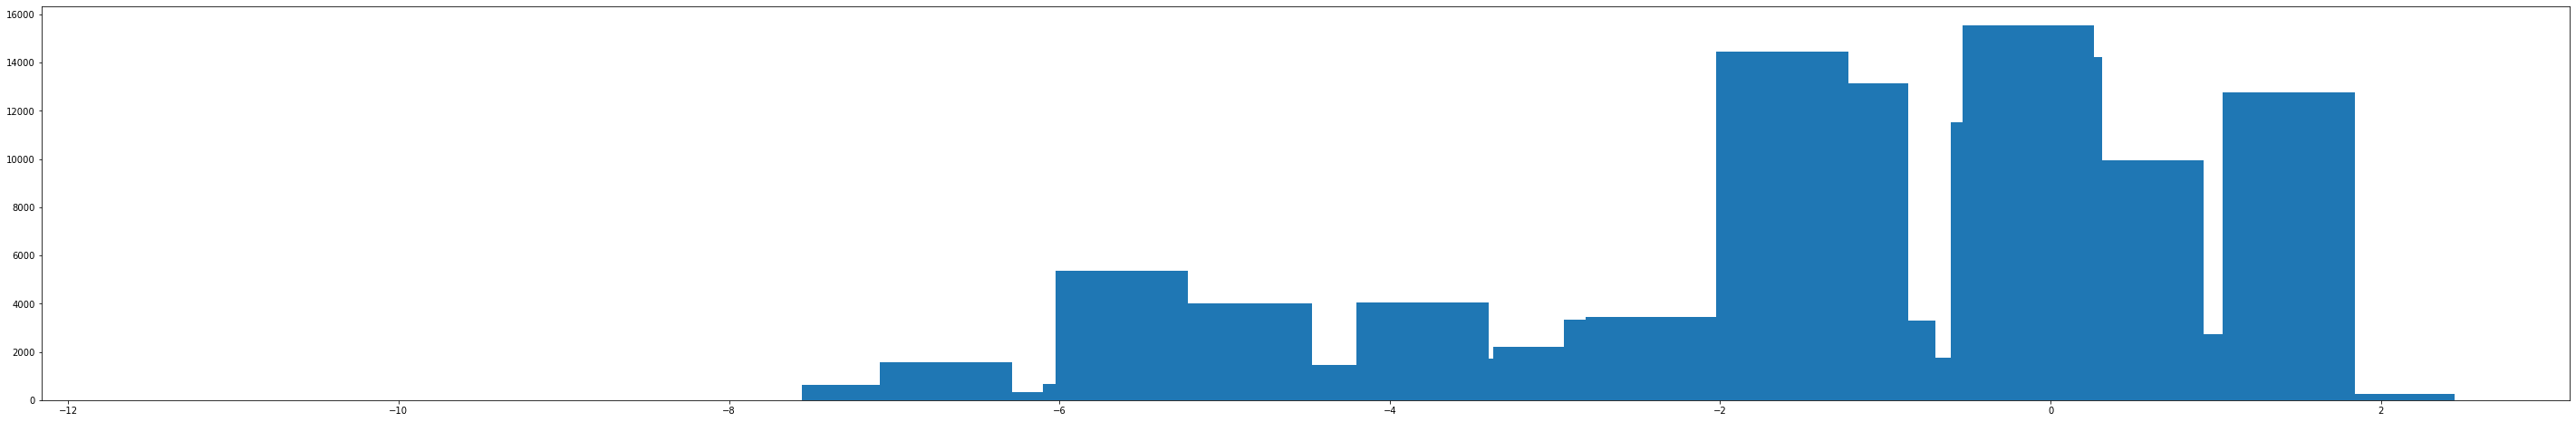

In [23]:
plt.figure(figsize=(50,8))
plt.bar(df2['tone'],df2['count'])
plt.show()

In [28]:
query = """
SELECT DISTINCT ActionGeo_FullName
FROM df
WHERE ActionGeo_FullName like '%Sorong%'
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_FullName'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
# Show the top 20 results
df2.head(10)

,ActionGeo_FullName


In [ ]:
query = """
SELECT DISTINCT ActionGeo_ADM1
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_FullName','EventCode','count','tone'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
df2['tone'] = df2['tone'].astype(float)
# Show the top 20 results
df2.head(10)